# Carregando Dataset:

In [8]:
import numpy as np

paths = [
    "data/processed/PE_glicol_mm4000.txt",
    "data/processed/PE_glicol_mm10000.txt",
    "data/processed/Policaprolactona.txt",
    "data/processed/Poliisopreno_trans_633nm.txt",
    "data/processed/Poliisopreno_trans_785nm.txt"
]

for i, path in enumerate(paths):
    data = np.loadtxt(path, delimiter='\t')
    x_points = data[:, 1]
    if i == 0:
        x_array = np.array([x_points])
    else:
        x_array = np.vstack((x_array, x_points))

print(x_array.shape)

(5, 1600)


# Reduzindo Dimensionalidade (PCA):

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_polymers = pca.fit_transform(x_array)

print(pca_polymers)

[[-4.81074102 -3.36229435]
 [-3.84665265 -3.39796263]
 [13.86937156 -0.70836834]
 [-1.25815531  3.74984479]
 [-3.95382258  3.71878054]]



# Plotando os vetores reduzidos dos espectros dos polímeros:

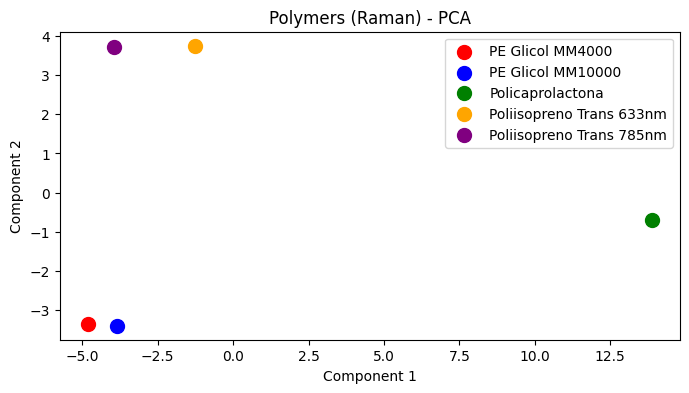

In [11]:
import matplotlib.pyplot as plt

X = pca_polymers[:, 0]
Y = pca_polymers[:, 1]

names = ["PE Glicol MM4000", "PE Glicol MM10000", "Policaprolactona", "Poliisopreno Trans 633nm", "Poliisopreno Trans 785nm"]
colors = ["red", "blue", "green", "orange", "purple"]

plt.figure(figsize=(8, 4))
for xi, yi, nome, cor in zip(X, Y, names, colors):
    plt.scatter(xi, yi, color=cor, s=100, label=nome)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Polymers (Raman) - PCA")
plt.legend()
plt.show()